In [1]:
import pandas as pd
import numpy as np

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.width', 100000)


In [3]:
#import plotly.go
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [4]:
data_0 = pd.read_csv(r'C:\Users\ayush\Desktop\IITB\IMCP_2\round-3-island-data-bottle\prices_round_3_day_0.csv', sep=';')
data_1 = pd.read_csv(r'C:\Users\ayush\Desktop\IITB\IMCP_2\round-3-island-data-bottle\prices_round_3_day_1.csv', sep=';')
data_2 = pd.read_csv(r'C:\Users\ayush\Desktop\IITB\IMCP_2\round-3-island-data-bottle\prices_round_3_day_2.csv', sep=';')


In [5]:
data_0.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0


In [6]:
## plot using plotly
data = pd.concat([data_0
                  ], axis=0)

data['timestamp'] += data['day'] * 1e6

In [7]:
data_choco = data[data['product'] == 'CHOCOLATE']
data_straw = data[data['product'] == 'STRAWBERRIES']
data_rose = data[data['product'] == 'ROSES']
data_gift = data[data['product'] == 'GIFT_BASKET']

In [8]:
def add_spread(data):
    data['spread'] = data['ask_price_1'] - data['bid_price_1']
    data.reset_index(drop=True, inplace=True)
add_spread(data_choco)
add_spread(data_straw)
add_spread(data_rose)
add_spread(data_gift)

C:\Users\ayush\AppData\Local\Temp\ipykernel_28264\2770141709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['spread'] = data['ask_price_1'] - data['bid_price_1']
C:\Users\ayush\AppData\Local\Temp\ipykernel_28264\2770141709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['spread'] = data['ask_price_1'] - data['bid_price_1']
C:\Users\ayush\AppData\Local\Temp\ipykernel_28264\2770141709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [9]:
data_gift['spread'].describe()

count    10000.000000
mean        10.929700
std          2.399278
min          1.000000
25%         11.000000
50%         11.000000
75%         13.000000
max         14.000000
Name: spread, dtype: float64

In [10]:
data_gift['valuation'] = 4 * data_choco['mid_price'] + 6 * data_straw['mid_price'] + data_rose['mid_price'] 

C:\Users\ayush\AppData\Local\Temp\ipykernel_28264\1385181905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gift['valuation'] = 4 * data_choco['mid_price'] + 6 * data_straw['mid_price'] + data_rose['mid_price']


In [11]:
data_gift['diff'] = data_gift['valuation'] - data_gift['mid_price']

C:\Users\ayush\AppData\Local\Temp\ipykernel_28264\1506370250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gift['diff'] = data_gift['valuation'] - data_gift['mid_price']


In [12]:
data_gift['diff'].describe()

count    10000.000000
mean      -370.230600
std         85.293178
min       -562.000000
25%       -433.000000
50%       -379.500000
75%       -310.000000
max       -140.000000
Name: diff, dtype: float64

## Helper functions


In [13]:
import talib as ta

def add_indicators(data):

    data['sma_5'] = ta.SMA(data['mid_price'], timeperiod=5) - data['mid_price']
    data['sma_10'] = ta.SMA(data['mid_price'], timeperiod=10) - data['mid_price']
    data['sma_20'] = ta.SMA(data['mid_price'], timeperiod=20) - data['mid_price']
    data['sma_50'] = ta.SMA(data['mid_price'], timeperiod=50) - data['mid_price']
    data['sma_100'] = ta.SMA(data['mid_price'], timeperiod=100) - data['mid_price']
    data['sma_200'] = ta.SMA(data['mid_price'], timeperiod=200) - data['mid_price']
    data['ema_5'] = ta.EMA(data['mid_price'], timeperiod=5) - data['mid_price']
    data['ema_10'] = ta.EMA(data['mid_price'], timeperiod=10) - data['mid_price']
    data['ema_20'] = ta.EMA(data['mid_price'], timeperiod=20) - data['mid_price']
    data['ema_50'] = ta.EMA(data['mid_price'], timeperiod=50) - data['mid_price']
    data['ema_100'] = ta.EMA(data['mid_price'], timeperiod=100) - data['mid_price']
    data['ema_200'] = ta.EMA(data['mid_price'], timeperiod=200) - data['mid_price']
    data['rsi'] = ta.RSI(data['mid_price'], timeperiod=14)
    data['macd'], data['macd_signal'], data['macd_hist'] = ta.MACD(data['mid_price'])
    data['macd_signal'] = data['macd_signal']
    data['macd_hist'] = data['macd_hist']
    data['macd_diff'] = data['macd'] - data['macd_signal']

add_indicators(data_gift)
add_indicators(data_choco)
add_indicators(data_straw)
add_indicators(data_rose)
    

C:\Users\ayush\AppData\Local\Temp\ipykernel_28264\3137240827.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sma_5'] = ta.SMA(data['mid_price'], timeperiod=5) - data['mid_price']
C:\Users\ayush\AppData\Local\Temp\ipykernel_28264\3137240827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sma_10'] = ta.SMA(data['mid_price'], timeperiod=10) - data['mid_price']
C:\Users\ayush\AppData\Local\Temp\ipykernel_28264\3137240827.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [14]:
def calculate_macd(df, fast_period=3, slow_period=99, signal_period=2):
    # Calculate the short-term exponential moving average (EMA)
    ema_fast = df['mid_price'].ewm(span=fast_period).mean()
    
    # Calculate the long-term exponential moving average (EMA)
    ema_slow = df['mid_price'].ewm(span=slow_period).mean()
    
    # Calculate the MACD line
    macd_line = ema_fast - ema_slow
    
    # Calculate the signal line
    signal_line = macd_line.ewm(span=signal_period).mean()
    
    # Calculate the MACD histogram
    macd_hist = macd_line - signal_line
    
    df['macd_line'] = macd_line
    df['signal_line'] = signal_line
    df['macd_hist'] = macd_hist

    return df

In [15]:
def plot_sunlight_humidity_orchids(data):
    fig = go.Figure()

    # Add SUNLIGHT trace
    fig.add_trace(go.Scatter(x=data['timestamp'], y=data['bid_price_1'], name='bid_price_1'))

    # Add HUMIDITY trace
    fig.add_trace(go.Scatter(x=data['timestamp'], y=data['bid_price_2'], name='bid_price_2'))

    # Add ORCHIDS trace
    fig.add_trace(go.Scatter(x=data['timestamp'], y=data['ask_price_1'], name='ask_price_1'))

    # Add export target trace   
    fig.add_trace(go.Scatter(x=data['timestamp'], y=data['ask_price_2'], name='ask_price_2'))

    # fig.add_trace(go.Scatter(x=data['timestamp'], y=data['IMPORT_TARIFF'], name='IMPORT_TARIFF', yaxis='y5'))

    # Update layout
    fig.update_layout(title='Sunlight, Humidity, and Orchids',
                    xaxis_title='Timestamp',
                    yaxis=dict(title='SUNLIGHT', side='left'))
                    

    # Show the plot
    fig.show()

plot_sunlight_humidity_orchids(data_straw)

In [16]:
plot_sunlight_humidity_orchids(data_rose)

In [17]:
def print_corrs(df, alphas, rets = ['ret_10', 'ret_30', 'ret_300', 'ret_5']):
# def print_corrs(df, alphas, rets = ['ret_10', 'ret_30', 'iv_10']):
# def print_corrs(df, alphas, rets = ['tick_10', 'tick_30', 'tick_60', 'tick_300']):
# def print_corrs(df, alphas, rets = ['ret_60', 'ret_300', 'iv_60']):
    msg = "                                      "
    for ret in rets:
        msg += f"{ret:>8s}"
    print(msg)
    for alpha in alphas:
        msg = f"{alpha:30s} corr -> "
        for ret in rets:
            msg += f"{df[alpha].corr(df[ret])*100:7.2f} "
        print(msg)
    print()

In [18]:
def print_buckets(df, alphas, rets = ['ret_10', 'ret_5', 'ret_30', 'ret_300'], aggfunc = ['mean', 'median', 'count'], buckets = 5):
# def print_buckets(df, alphas, rets = ['ret_10', 'ret_30', 'iv_10'], aggfunc = ['mean', 'median', 'count']):
# def print_buckets(df, alphas, rets = ['tick_10', 'tick_30', 'tick_60', 'tick_300'], aggfunc = ['mean', 'median', 'count']):
# def print_buckets(df, alphas, rets = ['ret_60', 'ret_300', 'iv_60'], aggfunc = ['mean', 'median', 'count']):
    for alpha in alphas:
        msg = df.pivot_table(index = pd.qcut(df[alpha],buckets,duplicates='drop'), values=rets, aggfunc=aggfunc)
        print(msg)

In [19]:
def add_ret(df, periods = [1, 5, 10, 30, 60, 300]):
    for period in periods:
        df[f'ret_{period}'] = df['mid_price'].pct_change(period).shift(-period) * 1e4
    return df
df = add_ret(data_gift)
_ = add_ret(data_choco)
_ = add_ret(data_straw)
_ = add_ret(data_rose)

C:\Users\ayush\AppData\Local\Temp\ipykernel_28264\212480902.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ayush\AppData\Local\Temp\ipykernel_28264\212480902.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ayush\AppData\Local\Temp\ipykernel_28264\212480902.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [20]:
indicators = ['sma_5', 'sma_10', 'sma_20', 'sma_50', 'sma_100', 'sma_200', 'ema_5', 'ema_10', 'ema_20', 'ema_50', 'ema_100', 'ema_200', 'rsi', 'macd', 'macd_signal', 'macd_hist', 'macd_diff']
print_corrs(data_gift, indicators)

                                        ret_10  ret_30 ret_300   ret_5
sma_5                          corr ->    0.07   -0.78    1.00   -0.15 
sma_10                         corr ->    0.26   -0.81    1.43   -0.41 
sma_20                         corr ->   -0.29   -0.95    2.33   -0.32 
sma_50                         corr ->   -0.68   -0.46    4.19   -0.71 
sma_100                        corr ->   -0.15    0.25    7.01   -0.33 
sma_200                        corr ->   -0.21   -0.02   13.82   -0.33 
ema_5                          corr ->    0.12   -0.81    1.23   -0.17 
ema_10                         corr ->    0.01   -0.88    1.83   -0.31 
ema_20                         corr ->   -0.34   -0.84    2.87   -0.49 
ema_50                         corr ->   -0.40   -0.27    5.38   -0.55 
ema_100                        corr ->   -0.19    0.15    9.35   -0.38 
ema_200                        corr ->    0.40    1.12   15.79    0.07 
rsi                            corr ->   -0.06   -0.38   -3.56   

In [21]:
print_corrs(df, ['mid_price', 'spread', 'diff'])
print_buckets(df, ['mid_price', 'spread', 'diff'])

                                        ret_10  ret_30 ret_300   ret_5
mid_price                      corr ->   -7.93  -13.88  -43.24   -5.58 
spread                         corr ->   -0.08   -0.49   -0.74   -1.10 
diff                           corr ->   11.50   19.20   49.51    8.41 

                          mean                                   median                                 count                     
                        ret_10    ret_30    ret_300     ret_5    ret_10    ret_30    ret_300     ret_5 ret_10 ret_30 ret_300 ret_5
mid_price                                                                                                                         
(70823.499, 71075.5]  0.319551  1.044478  12.473544  0.154331  0.422562  1.022018  11.680599  0.140823   2006   2006    2006  2006
(71075.5, 71183.5]    0.186378  0.589608   2.113764  0.105699  0.281086  0.421612   5.620069  0.140519   2005   2001    1848  2010
(71183.5, 71259.5]    0.035712  0.116340  -3.176021 -0.01

                   mean                                  median                             count                     
                 ret_10    ret_30   ret_300     ret_5    ret_10    ret_30   ret_300  ret_5 ret_10 ret_30 ret_300 ret_5
spread                                                                                                                
(0.999, 11.0] -0.007476 -0.037235 -0.710604 -0.000934  0.070021 -0.070208 -1.332997  0.000   6948   6933    6735  6952
(11.0, 13.0]  -0.043546 -0.072219 -0.876460 -0.032658  0.000000 -0.140311 -1.544998  0.000   2758   2754    2689  2759
(13.0, 14.0]  -0.392909 -0.946666 -3.314207 -0.181797 -0.489750 -0.913306 -4.132861 -0.211    284    283     276   284
                        mean                                   median                                 count                     
                      ret_10    ret_30    ret_300     ret_5    ret_10    ret_30    ret_300     ret_5 ret_10 ret_30 ret_300 ret_5
diff                        

## Analysing plots

In [22]:
data_choco['diff'] = data_gift['diff']
data_straw['diff'] = data_gift['diff']
data_rose['diff'] = data_gift['diff']

print_corrs(data_choco, ['diff'])
print_corrs(data_straw, ['diff'])
print_corrs(data_rose, ['diff'])


print_buckets(data_choco, ['diff'])
print_buckets(data_straw, ['diff'])
print_buckets(data_rose, ['diff'])

                                        ret_10  ret_30 ret_300   ret_5
diff                           corr ->    5.22    9.10   18.37    3.95 

                                        ret_10  ret_30 ret_300   ret_5
diff                           corr ->    4.94    8.21   27.22    3.11 

                                        ret_10  ret_30 ret_300   ret_5
diff                           corr ->    0.04   -0.45   -8.27   -0.05 



C:\Users\ayush\AppData\Local\Temp\ipykernel_28264\1508075795.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ayush\AppData\Local\Temp\ipykernel_28264\1508075795.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ayush\AppData\Local\Temp\ipykernel_28264\1508075795.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

                        mean                               median                            count                     
                      ret_10    ret_30   ret_300     ret_5 ret_10    ret_30   ret_300 ret_5 ret_10 ret_30 ret_300 ret_5
diff                                                                                                                   
(-562.001, -446.6] -0.209686 -0.991933 -6.475085 -0.115213    0.0 -1.246883 -9.988139   0.0   1993   1973    1891  1998
(-446.6, -397.5]   -0.243217 -0.309484 -3.649287 -0.126218    0.0 -0.622355 -4.971723   0.0   2007   2007    1885  2007
(-397.5, -358.0]    0.078021  0.403710  4.717218  0.037364    0.0  0.623131  3.742398   0.0   2004   2004    1938  2004
(-358.0, -293.5]    0.058845 -0.166695 -2.261014  0.056530    0.0  0.000000 -6.251172   0.0   1996   1996    1996  1996
(-293.5, -140.0]    0.237149  0.847561  4.727371  0.109253    0.0  0.625469  3.737503   0.0   1990   1990    1990  1990
                        mean            

## MACD params on each of the indivisual elements

In [23]:
def calculate_max_corr(df):
    max_corr = 1
    max_period = ()
    for fast_period in range(24, 50):
        for slow_period in range(40, 80):
            for signal_period in range(20, 40):
                df_macd = calculate_macd(df, fast_period, slow_period, signal_period)
                corr = df_macd['macd_hist'].corr(df_macd['ret_10'])
                if corr < max_corr:
                    max_corr = corr
                    max_period = (fast_period, slow_period, signal_period)
    return max_corr, max_period

In [24]:
# calculate_max_corr(data_straw)

In [25]:
# data_choco/.head()

In [26]:
## mark the regions on the xaxis when the diff is greater than 500 and smaller than 200
import plotly.graph_objects as go

# Sample data
x = data_choco['timestamp']
y = data_choco['mid_price']
diff = data_choco['diff']

# Create the figure
fig = go.Figure()

# Add line trace
fig.add_trace(go.Scatter(x=x, y=diff, mode='lines', name='Difference', line=dict(color='blue')))

# Mark the regions where the difference is greater than 500 and smaller than 200
for i in range(len(diff)):
    if diff[i] < -500:
        fig.add_shape(type="rect", x0=x[i], y0=min(diff), x1=x[i+1], y1=max(diff),
                      line=dict(color="red", width=0), fillcolor="red", opacity=0.3)
    elif diff[i] > -300:
        fig.add_shape(type="rect", x0=x[i], y0=min(diff), x1=x[i+1], y1=max(diff),
                      line=dict(color="green", width=0), fillcolor="green", opacity=0.3)

# Update layout
fig.update_layout(title='Difference Plot', xaxis_title='X-axis', yaxis_title='Difference', showlegend=True)

# Show plot
fig.show()


KeyboardInterrupt: 

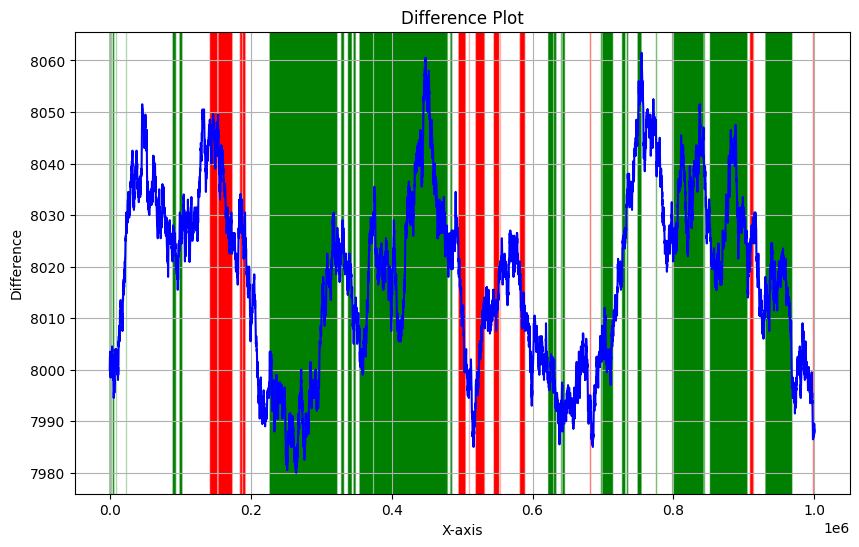

In [41]:
import matplotlib.pyplot as plt

# Sample data
x = data_choco['timestamp']
y = data_choco['mid_price']

# Calculate differences between consecutive points
diff = data_choco['diff']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, linestyle='-', color='b')

# Mark the regions where the difference is greater than 500 and smaller than 200
for i in range(len(diff)):
    if diff[i] < -500:
        plt.axvspan(x[i], x[i+1], color='red', alpha=0.3)
    elif diff[i] > -350:
        plt.axvspan(x[i], x[i+1], color='green', alpha=0.3)

plt.xlabel('X-axis')
plt.ylabel('Difference')
plt.title('Difference Plot')
plt.grid(True)
plt.show()

In [28]:
count = 0
successive_increases = 0
increase_seq = pd.DataFrame()
increase_seq['length'] = 0
increase_seq['diff'] = 0
## Add two columns in increase_seq


for i in range(1, len(data)):
    if data['mid_price'][i] > data['mid_price'][i-1]:
        successive_increases += 1
    else:
        increase_seq['length'].loc[i] = successive_increases
        increase_seq['diff'].loc[i] = data['mid_price'][i] - data['mid_price']

        successive_increases = 0
    
    if successive_increases == 40:
        count += 1
        successive_increases = 0

print("Number of instances with 40 successive increases in midprice:", count)



Number of instances with 40 successive increases in midprice: 0


In [29]:
data_choco['delta_diff'] = data_choco['diff'] - data_choco['diff'].shift(1)
data_choco['change'] = data_choco['mid_price'] - data_choco['mid_price'].shift(1)

data_choco['change'][0] = 0
data_choco['delta_diff'][0] = 0

C:\Users\ayush\AppData\Local\Temp\ipykernel_28264\1696599614.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ayush\AppData\Local\Temp\ipykernel_28264\1696599614.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ayush\AppData\Local\Temp\ipykernel_28264\1696599614.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [30]:
data_choco['delta_diff'].describe()

count    10000.000000
mean        -0.008200
std          6.242958
min        -27.500000
25%         -4.000000
50%          0.000000
75%          4.000000
max         22.000000
Name: delta_diff, dtype: float64

In [31]:
data_choco['delta_diff'].corr(data_choco['change'])

0.046218981275148306

In [40]:
df = data_choco
msg = df.pivot_table(index = pd.qcut(df['delta_diff'], 10,duplicates='drop'), values=['change'], aggfunc=['mean'])
print(msg)

                     mean
                   change
delta_diff               
(-27.501, -8.0] -0.070291
(-8.0, -5.0]    -0.098382
(-5.0, -3.0]    -0.046183
(-3.0, -1.5]     0.038150
(-1.5, 0.0]     -0.016053
(0.0, 1.5]       0.000540
(1.5, 3.0]       0.000553
(3.0, 5.0]       0.062500
(5.0, 8.0]       0.075369
(8.0, 22.0]      0.076600


In [32]:
print_corrs(data_choco, ['delta_diff', 'diff'])
print_buckets(data_choco, ['delta_diff'], buckets = 20)

                                        ret_10  ret_30 ret_300   ret_5
delta_diff                     corr ->    0.47   -0.37    1.48    0.60 
diff                           corr ->    5.22    9.10   18.37    3.95 

                      mean                                  median                                count                     
                    ret_10    ret_30   ret_300     ret_5    ret_10    ret_30   ret_300     ret_5 ret_10 ret_30 ret_300 ret_5
delta_diff                                                                                                                  
(-27.501, -10.0] -0.097971  0.203523 -1.226414 -0.102612  0.000000  0.000000 -3.738784  0.000000    604    602     582   604
(-10.0, -8.0]    -0.171692 -0.153392 -1.123453 -0.088742 -0.621350  0.000000 -3.738085  0.000000    463    462     453   463
(-8.0, -6.5]     -0.109834 -0.107584 -1.662395 -0.144914  0.000000 -0.623169 -4.358384  0.000000    484    484     468   484
(-6.5, -5.0]     -0.011004  0.0331

In [44]:
from scipy.stats import zscore

# Sample data
points = data_choco['mid_price']

# Calculate the z-score using a rolling window of 200 values
z_scores = points.rolling(window=200).apply(lambda x: zscore(x)[-1] if len(x) > 0 else None, raw=True)

# Add the z-scores as a new column in the DataFrame
data_choco['z_scores'] = z_scores


C:\Users\ayush\AppData\Local\Temp\ipykernel_28264\3591031978.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
data_choco['z_scores'].describe()

count    9801.000000
mean       -0.041205
std         1.394510
min        -3.959516
25%        -1.159796
50%        -0.116785
75%         1.089305
max         4.108949
Name: z_scores, dtype: float64

In [50]:
data_choco.head()
for i in range(len(data_choco)):
    if data_choco['z_scores'][i] == np.nan:
        data_choco['z_scores'][i] = 0
    print("yes")


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


KeyError: 10000

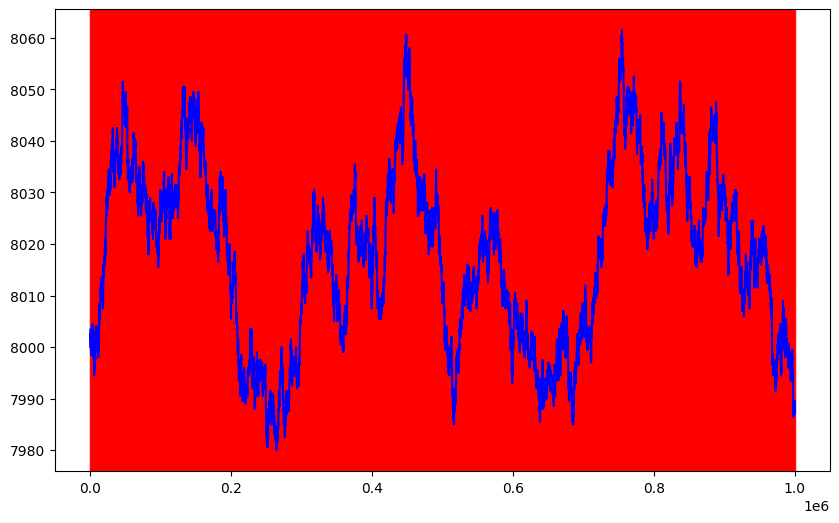

In [51]:
import matplotlib.pyplot as plt

# Sample data
x = data_choco['timestamp']
y = data_choco['mid_price']

# Calculate differences between consecutive points
diff = data_choco['diff']
z_score = data_choco['z_scores']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, linestyle='-', color='b')

# Mark the regions where the difference is greater than 500 and smaller than 200
for i in range(len(diff)):
    if diff[i] < -2:
        plt.axvspan(x[i], x[i+1], color='red', alpha=0.3)
    elif diff[i] > 2:
        plt.axvspan(x[i], x[i+1], color='green', alpha=0.3)

plt.xlabel('X-axis')
plt.ylabel('Difference')
plt.title('Difference Plot')
plt.grid(True)
plt.show()